In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [112]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [113]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [114]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [115]:
df.replace(to_replace=["Male","Female"],value=[1,0])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [116]:
df1=df.iloc[:,3:5]

In [117]:
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


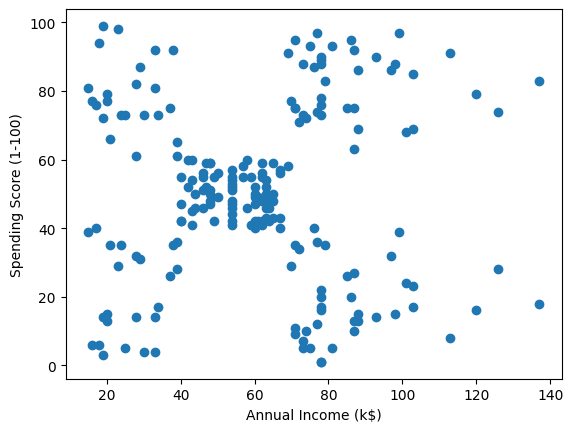

In [118]:
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

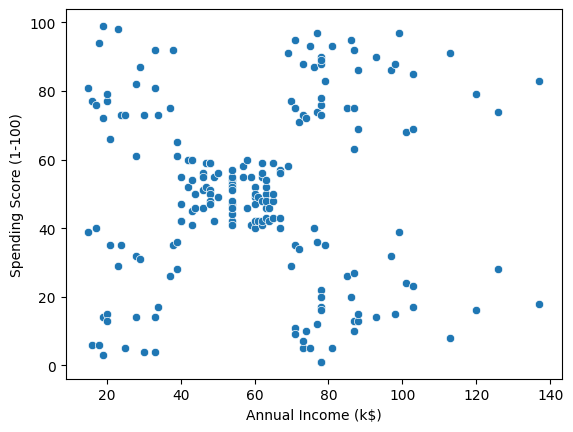

In [119]:
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)")

In [120]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init="k-means++",random_state=0).fit(df1)
km

KMeans(n_clusters=3, random_state=0)

In [121]:
color=km.labels_
color

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [122]:
centroid=km.cluster_centers_
centroid

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [123]:
x=[i[0] for i in centroid]
y=[i[1]for i in centroid]

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

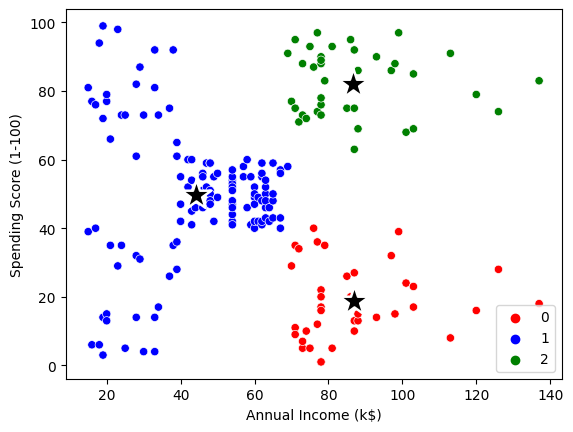

In [124]:
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)",hue=color,palette=['red','blue','green'])
sns.scatterplot(x=x,y=y,marker="*",s=500,color='black')

In [125]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",random_state=0).fit(df1)
    wcss.append(km.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049438,
 20736.679938924124]

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'WCSS')]

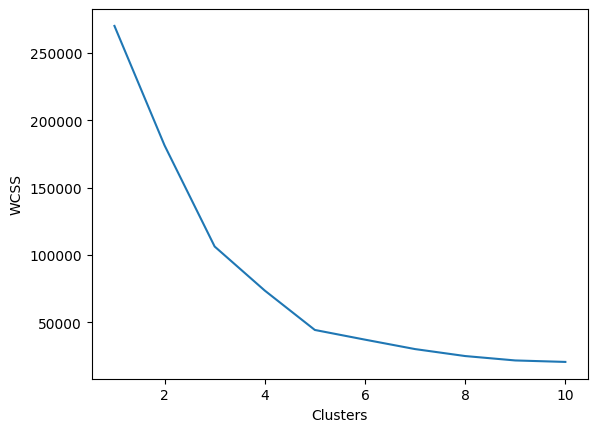

In [126]:
sns.lineplot(x=[i for i in range(1,11)],y=wcss).set(xlabel="Clusters",ylabel="WCSS")

In [127]:
from sklearn.cluster import KMeans

In [128]:
km1=KMeans(n_clusters=5,init="k-means++",random_state=0).fit(df1)
km

KMeans(n_clusters=10, random_state=0)

In [129]:
color1=km1.labels_
color1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [130]:
centroid1=km1.cluster_centers_
centroid1

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [131]:
x=[i[0] for i in centroid1]
y=[i[1] for i in centroid1]

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

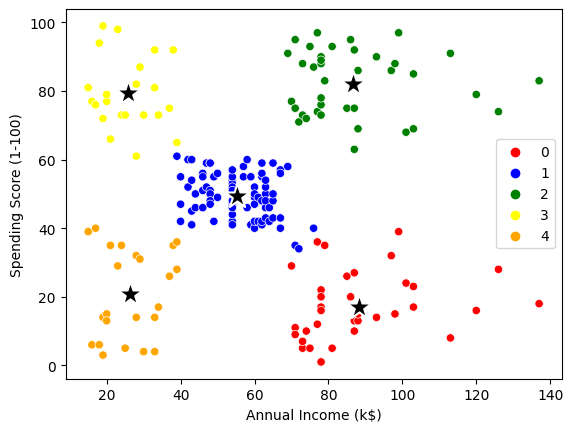

In [132]:
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)",hue=color1, palette=['red','blue','green','yellow','orange'])
sns.scatterplot(x=x,y=y,marker='*',s=350,color='black')

In [142]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=5,affinity='euclidean').fit(df1)
ac

AgglomerativeClustering(n_clusters=5)

In [143]:
n = ac.labels_
n

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [134]:
import scipy.cluster.hierarchy as sch

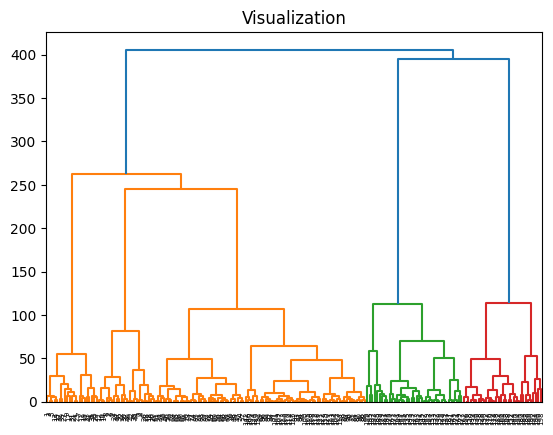

In [135]:
plt.title("Visualization")
dendogram=sch.dendrogram(sch.linkage(df1, method='ward'))

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

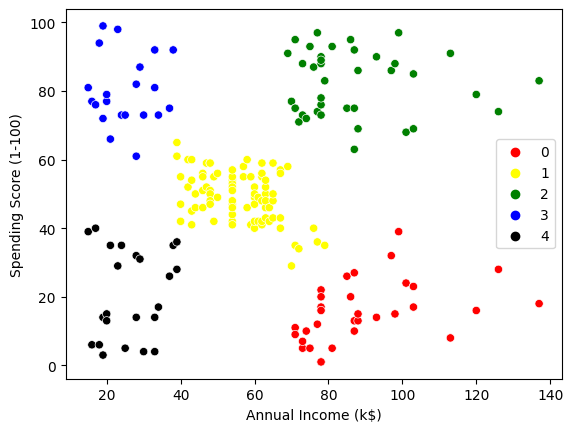

In [144]:
sns.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)',hue=n,palette=['red','yellow','green','blue','black'])